In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("911.csv")

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df['zip'].value_counts()

In [ ]:
df['twp'].value_counts()

In [109]:
len(df['title'].unique())

110

In [110]:
df['Reason'] = df['title'].apply(lambda title: title.split(":")[0])

In [111]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

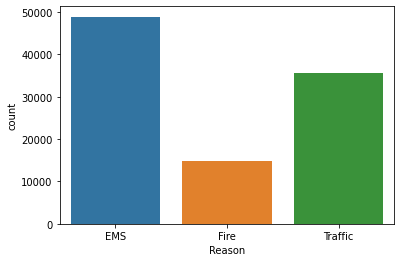

In [112]:
sns.countplot(x='Reason', data=df)

In [113]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [114]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [138]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [139]:
df['Day'] = df['Day'].map({
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri",
    5: "Sat",
    6: "Sun"
})

<AxesSubplot:xlabel='Day', ylabel='count'>

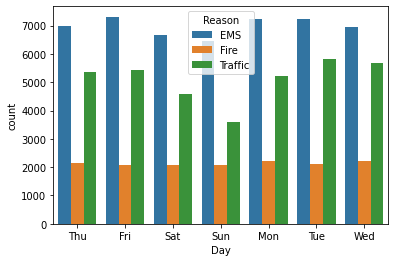

In [140]:
sns.countplot(x='Day', data=df, hue='Reason')

<AxesSubplot:xlabel='Month', ylabel='count'>

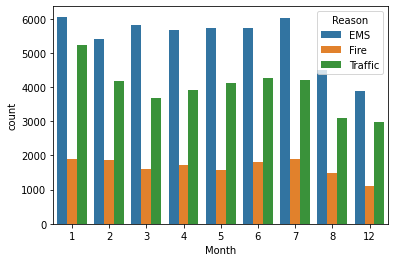

In [141]:
sns.countplot(x='Month', data=df, hue='Reason')

In [142]:
byMonth = df.groupby("Month").count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Data
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

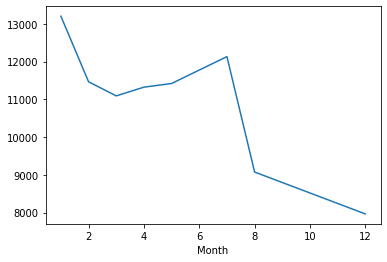

In [143]:
byMonth['twp'].plot()

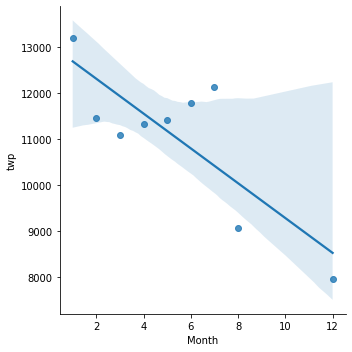

In [144]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [145]:
df['Data'] = df['timeStamp'].apply(lambda x : x.date())

<AxesSubplot:xlabel='Data'>

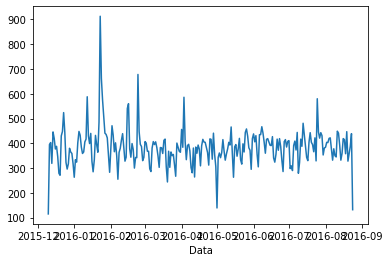

In [146]:
df.groupby("Data").count()['twp'].plot()

<AxesSubplot:xlabel='Data'>

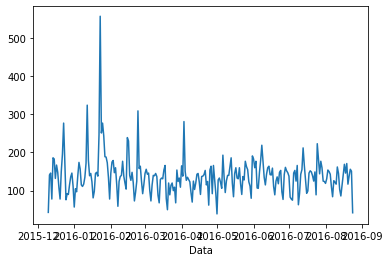

In [147]:
df[df['Reason']=="Traffic"].groupby("Data").count()['twp'].plot()

<AxesSubplot:xlabel='Data'>

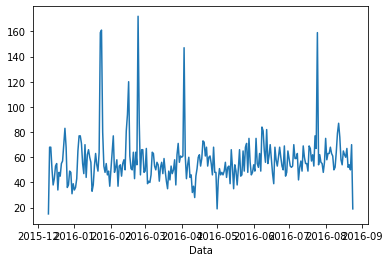

In [148]:
df[df['Reason']=="Fire"].groupby("Data").count()['twp'].plot()

<AxesSubplot:xlabel='Data'>

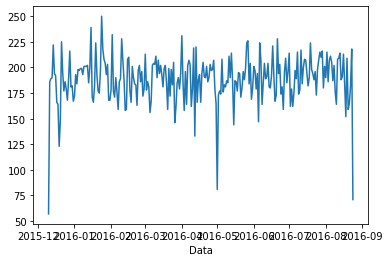

In [149]:
df[df['Reason']=="EMS"].groupby("Data").count()['twp'].plot()

In [188]:
dayhour=df.groupby(by=['Day', 'Hour']).count()['twp'].unstack()
dayhour.head(10)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


<AxesSubplot:xlabel='Hour', ylabel='Day'>

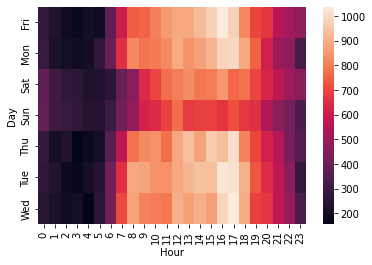

In [194]:
sns.heatmap(data=dayhour)

<Figure size 864x432 with 0 Axes>

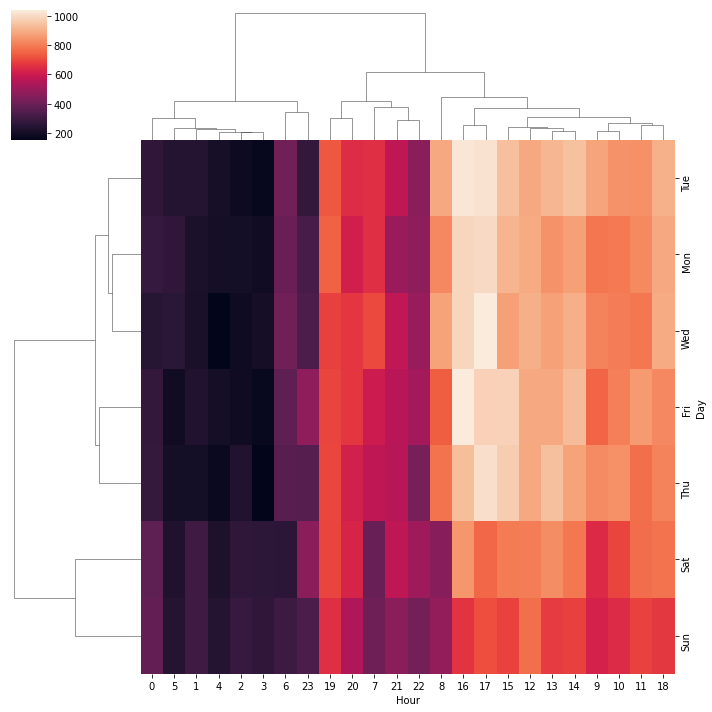

In [195]:
plt.figure(figsize=(12,6))
sns.clustermap(dayhour)

In [196]:
dayMonth=df.groupby(by=['Day', 'Month']).count()['twp'].unstack()
dayMonth.head(10)

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


<AxesSubplot:xlabel='Month', ylabel='Day'>

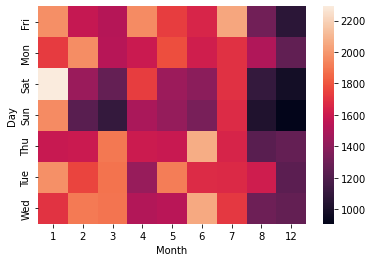

In [197]:
sns.heatmap(dayMonth)

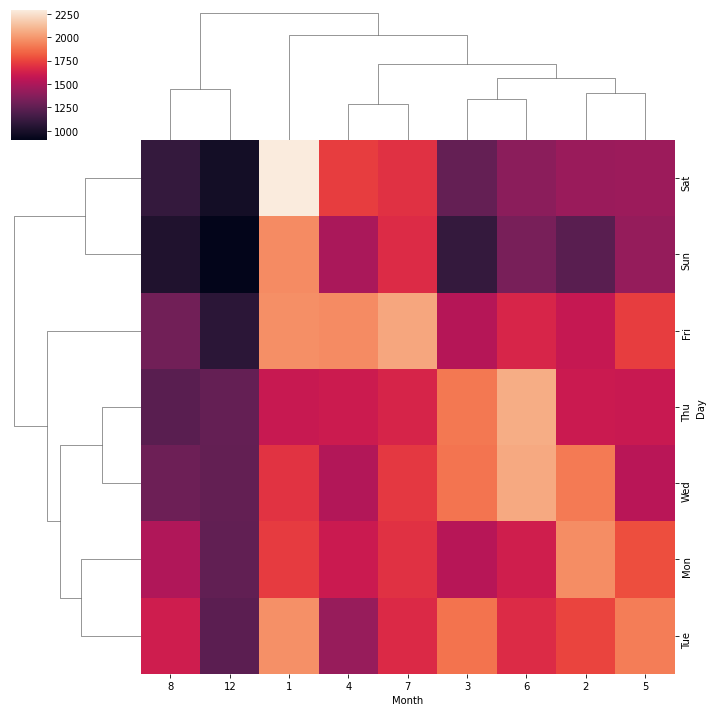

In [198]:
sns.clustermap(dayMonth)